In [120]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.style

matplotlib.style.available

%matplotlib inline

In [163]:
X, Y = np.mgrid[0:5, 0:5]
X, Y = np.meshgrid(sorted(np.random.random(5)), sorted(np.random.random(4)))
X, Y = np.meshgrid()

In [164]:
def grid2enclosure(X, Y):
    """Generate cell boundaries """
    # compute gradients in X and Y
    Xx, Xy = np.gradient(X)
    Yx, Yy = np.gradient(Y)
    
    print(Xx.any(), Xy.any())

    # lower left
    ll = np.c_[(X - 0.5*Xx - 0.5*Xy).ravel(), (Y - 0.5*Yy - 0.5*Yx).ravel()]
    # lower right
    lr = np.c_[(X + 0.5*Xx - 0.5*Xy).ravel(), (Y - 0.5*Yy + 0.5*Yx).ravel()]
    # upper left
    ul = np.c_[(X - 0.5*Xx + 0.5*Xy).ravel(), (Y + 0.5*Yy - 0.5*Yx).ravel()]
    # upper right
    ur = np.c_[(X + 0.5*Xx + 0.5*Xy).ravel(), (Y + 0.5*Yy + 0.5*Yx).ravel()]

    # number of cells x 5 points/cell x 2 (x,y)
    verts = np.hstack(
        [
            ll[:,np.newaxis,:], 
            lr[:,np.newaxis,:], 
            ur[:,np.newaxis,:], 
            ul[:,np.newaxis,:],
            ll[:,np.newaxis,:] 

        ]
    )
    return verts
verts = grid2enclosure(X, Y)

False True


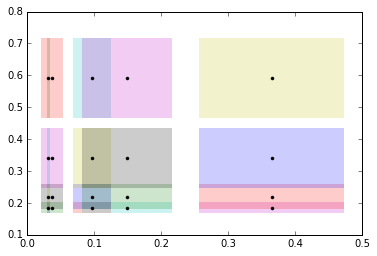

In [165]:
plt.plot(X.ravel(), Y.ravel(), 'k.')
for vert in verts:
    plt.fill(vert[:,0], vert[:,1], edgecolor='none', alpha=0.2)

In [166]:
import matplotlib.transforms

In [167]:
T = matplotlib.transforms.Affine2D()
T.rotate_around(1, 1, 0.1 * np.pi)


Affine2D(array([[ 0.95105652, -0.30901699,  0.35796048],
       [ 0.30901699,  0.95105652, -0.26007351],
       [ 0.        ,  0.        ,  1.        ]]))

True True


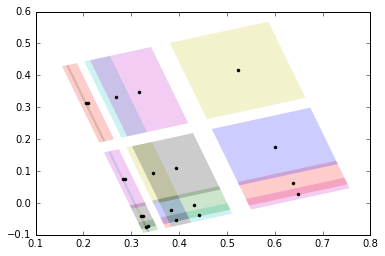

In [168]:
XY_t = T.transform(np.c_[X.ravel(), Y.ravel()])
X_t, Y_t = XY_t[:,0].reshape(X.shape), XY_t[:,1].reshape(Y.shape)
vert_t = [T.transform(vert) for vert in verts]
vert_t = grid2enclosure(X_t, Y_t)

plt.plot(X_t, Y_t, 'k.')
for vert in vert_t:
    plt.fill(vert[:,0], vert[:,1], edgecolor='none', alpha=0.2)

In [169]:
T.skew(0.8, 0.3)


Affine2D(array([[ 1.26923233,  0.67022746,  0.09017876],
       [ 0.60321325,  0.85546636, -0.14934336],
       [ 0.        ,  0.        ,  1.        ]]))

True True


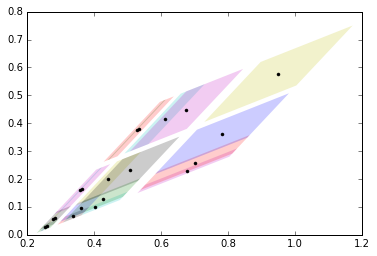

In [170]:
XY_t = T.transform(np.c_[X.ravel(), Y.ravel()])
X_t, Y_t = XY_t[:,0].reshape(X.shape), XY_t[:,1].reshape(Y.shape)
vert_t = [T.transform(vert) for vert in verts]
vert_t = grid2enclosure(X_t, Y_t)

plt.plot(X_t, Y_t, 'k.')
for vert in vert_t:
    plt.fill(vert[:,0], vert[:,1], edgecolor='none', alpha=0.2)

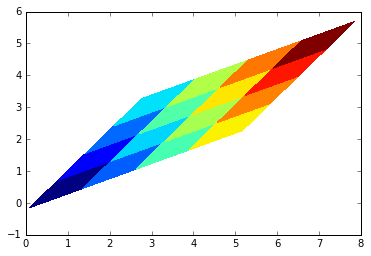

In [157]:
# note that this has 1 cell less
mesh = plt.pcolormesh(X_t, Y_t, X_t)

In [161]:
X = [1, 2, 4, 7]
Xx = np.gradient( [1, 2, 4, 7])
l = X - 0.5 * Xx
r = X + 0.5 * Xx

In [162]:
np.c_[l, r]

array([[ 0.5 ,  1.5 ],
       [ 1.25,  2.75],
       [ 2.75,  5.25],
       [ 5.5 ,  8.5 ]])